# Lucy's Notebook

Best neighborhood for courts and rinks
https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import geopandas
%matplotlib inline

data = pd.read_csv("CourtsAndRinks.csv")

# count number of courts and rinks in each neighborhood
data_neighborhood = data.groupby("neighborhood")['id'].count()

data_neighborhood

neighborhood
Allegheny Center       9
Allentown              1
Banksville             3
Bedford Dwellings      2
Beechview              7
                      ..
Terrace Village        5
Troy Hill              8
Upper Hill             1
Upper Lawrenceville    2
West End               2
Name: id, Length: 63, dtype: int64

In [3]:
# find out how many different types of courts there are
data.groupby("type")['id'].count()

type
Basketball (Full)    88
Basketball (Half)    23
Bocce                 8
Dek Hockey            5
General Sports        6
Hockey               14
Horseshoe Pit         2
Lawn Bowling          2
Pickleball           12
Street Hockey         8
Tennis               73
Volleyball            5
Name: id, dtype: int64

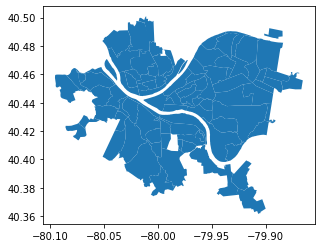

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot()

In [5]:
courtsandrinks_map = neighborhoods.merge(data_neighborhood, how='left', left_on='hood', right_index=True)
# look at the head to confirm it merged correctly
courtsandrinks_map

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,id
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",1.0
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",NaN
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",NaN
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",2.0
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",NaN
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,15,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444...",2.0
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462...",NaN
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,15,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412...",NaN


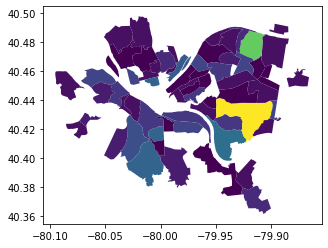

In [7]:
courtsandrinks_map.plot(column='id')

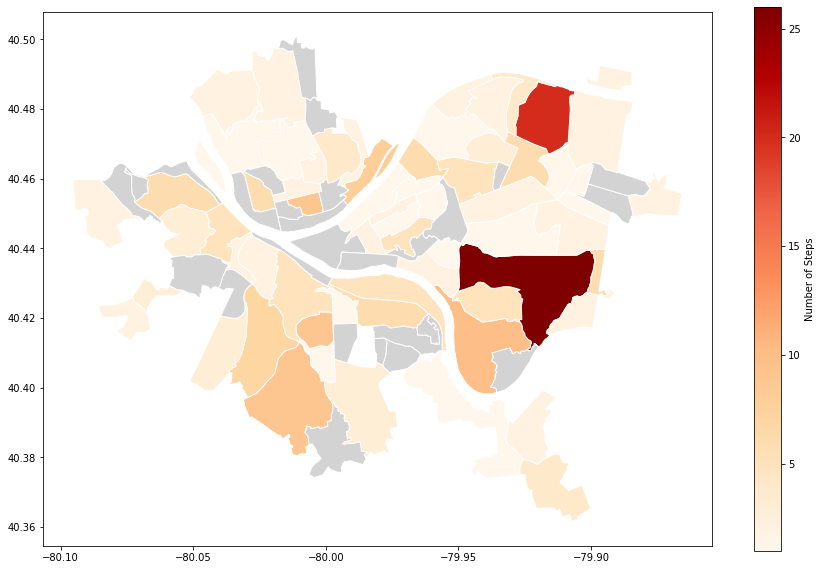

In [8]:
courtsandrinks_map.plot(column='id', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )